## Top 250 Movies On IMDb

IMDb(Internet Movies Database) is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. IMDb which began as a fan-operated movie database  as grown to be one of the most popular and trusted source for tv, movies reviews etc content.

This project explores data of a list of the top 250 movies on IMDb. It seeks to understand the characteristics of these movies / by what criteria IMDb uses to qualify them as 'TOP'.

The data used for this project was scrapped form IMDb website, processed and explored to bring about insights.

In [69]:
# Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import os
from bs4 import BeautifulSoup

In [70]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Data Gathering
Information to be gathered includes:
* movie_name : name of the movie
* year : year it was released
* runtime : duration of movies in min
* genre: category of the film
* rating : average rating by the voters
* metascore:score given by metacritic
* votes: number of users who gave ratings
* gross : gross revenue of the movie in dollars(M)
* rank : rank of the movie on the list from 1-250

In [71]:
#Making a list of the urls since they are split into 5 pages
urls = ['https://www.imdb.com/search/title/?groups=top_250&sort=user_rating',
       'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt',
       'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt',
       'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt',
       'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt']

In [156]:
# Making a list to store the scrapped information
df_list = []

# Looping through each url
for url in urls:
    response = requests.get(url)
    print(response)
    soup = BeautifulSoup(response.content, 'html.parser')
    movie_data = soup.find_all('div', class_= 'lister-item-content')

    #looping through each movie description
    for movie in movie_data:
        movie_name = movie.h3.a.text
        year = movie.h3.find('span', class_ ="lister-item-year text-muted unbold").text.replace('(', '').replace(')', '').replace('I', '')
        runtime = movie.p.find('span', class_ ="runtime").text.replace(' min', '')
        genre = movie.p.find('span',  class_ ="genre").text.strip()
        rating = movie.find('strong').text
        metascore = movie.find('span',  class_ ="metascore").text.strip() if movie.find('span', class_ = 'metascore') else''
        values = movie.find_all('span',  attrs = {'name':"nv"} )
        votes = values[0].text.replace(',', '')
        gross = values[1].text.replace('$', '').replace('M', '') if len(values) >  2 else ''
        rank = values[1].text.replace('#', '') if len(values) == 2 else values[2].text.replace('#', '')

         #Append to list of dictionaries
        df_list.append({'movie_name': movie_name,
                            'year': year,
                       'runtime(min)': runtime,
                       'genre': genre,
                       'rating': rating,
                       'metascore': metascore,
                       'votes': votes,
                       'gross($)(M)': gross, 
                       'rank': rank})
    df = pd.DataFrame(df_list, columns = ['movie_name', 'year', 'runtime(min)', 'genre', 'rating', 
                                          'metascore', 'votes', 'gross($)(M)', 'rank'])

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [158]:
df.sample(10)

,movie_name,year,runtime(min),genre,rating,metascore,votes,gross($)(M),rank
205,Salinui chueok,2003,131,"Crime, Drama, Mystery",8.1,82,185587,0.01,196
30,Shichinin no samurai,1954,207,"Action, Drama",8.6,98,346574,0.27,20
66,Taare Zameen Par,2007,165,"Drama, Family",8.4,,194343,1.22,122
216,In the Name of the Father,1993,133,"Biography, Crime, Drama",8.1,84,176291,25.01,189
156,The Elephant Man,1980,124,"Biography, Drama",8.2,78,242571,,155
117,Ladri di biciclette,1948,89,Drama,8.3,,164506,0.33,120
124,Green Book,2018,130,"Biography, Comedy, Drama",8.2,69,491548,85.08,132
147,Bacheha-Ye aseman,1997,89,"Drama, Family, Sport",8.2,77,75441,0.93,175
120,M - Eine Stadt sucht einen Mörder,1931,117,"Crime, Mystery, Thriller",8.3,,158962,0.03,97
208,Amores perros,2000,154,"Drama, Thriller",8.1,83,241599,5.38,237


In [159]:
# Save data to csv file
df.to_csv('Top 250 Movies IMDb.csv', index=False)

### Data processing / Cleaning

In [170]:
data = pd.read_csv('Top 250 Movies IMDb.csv')
data.sample(10)

,movie_name,year,runtime(min),genre,rating,metascore,votes,gross($)(M),rank
17,The Empire Strikes Back,1980,124,"Action, Adventure, Fantasy",8.7,82.0,1290373,290.48,15
45,Back to the Future,1985,116,"Adventure, Comedy, Sci-Fi",8.5,87.0,1203022,210.61,30
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,2645938,534.86,3
175,The General,1926,67,"Action, Adventure, Comedy",8.2,NaN,92264,1.03,186
107,2001: A Space Odyssey,1968,149,"Adventure, Sci-Fi",8.3,84.0,669535,56.95,92
67,WALL·E,2008,98,"Animation, Adventure, Family",8.4,95.0,1114762,223.81,57
49,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,97.0,672257,32.00,32
53,City Lights,1931,87,"Comedy, Drama, Romance",8.5,99.0,185535,0.02,52
188,12 Years a Slave,2013,134,"Biography, Drama, History",8.1,96.0,701829,56.67,180
215,Before Sunrise,1995,101,"Drama, Romance",8.1,77.0,309572,5.54,179


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_name    250 non-null    object 
 1   year          250 non-null    int64  
 2   runtime(min)  250 non-null    int64  
 3   genre         250 non-null    object 
 4   rating        250 non-null    float64
 5   metascore     229 non-null    float64
 6   votes         250 non-null    int64  
 7   gross($)(M)   220 non-null    float64
 8   rank          250 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 17.7+ KB


### Data Analysis / Visualization

In [175]:
# Summary Statistics
data.describe()

,year,runtime(min),rating,metascore,votes,gross($)(M),rank
count,250.000000,250.000000,250.000000,229.000000,2.500000e+02,220.000000,250.000000
mean,1986.488000,129.008000,8.309600,82.397380,6.382201e+05,98.075000,125.500000
std,25.225287,29.817112,0.227938,10.898422,5.155909e+05,137.176537,72.312977
min,1921.000000,45.000000,8.000000,55.000000,3.033700e+04,0.010000,1.000000
25%,1966.250000,108.000000,8.100000,75.000000,2.221732e+05,6.182500,63.250000
50%,1994.000000,126.500000,8.200000,84.000000,4.922405e+05,41.330000,125.500000
75%,2006.750000,145.000000,8.400000,90.000000,9.573938e+05,140.922500,187.750000
max,2022.000000,238.000000,9.300000,100.000000,2.673004e+06,858.370000,250.000000


### Univariate Analysis
**Years with the most top Movies**

In [180]:
year_10 = data['year'].value_counts().head(10)
year_10

1995    8
2004    7
2009    6
2003    6
1957    6
2019    6
1999    6
1975    5
2007    5
2000    5
Name: year, dtype: int64

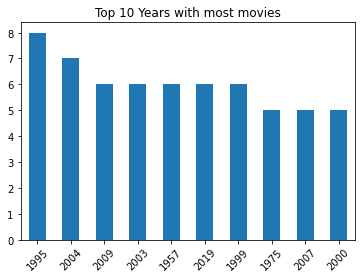

In [184]:
year_10.plot(kind = 'bar', rot = 45)
plt.title('Top 10 Years with most movies');

**Distributions**

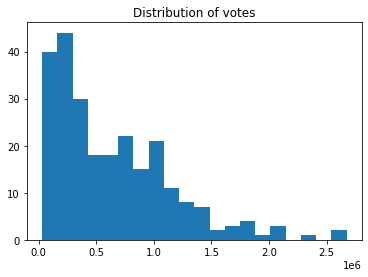

In [201]:
# Histogram of votes
plt.hist(data['votes'], bins = 20)
plt.title('Distribution of votes');

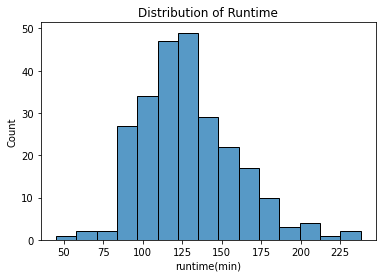

In [203]:
sns.histplot(data['runtime(min)'], bins = 15)
plt.title('Distribution of Runtime');

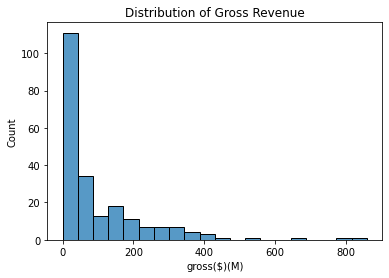

In [204]:
sns.histplot(data['gross($)(M)'], bins = 20)
plt.title('Distribution of Gross Revenue');

**Are the years with low gross revenues the old years?**

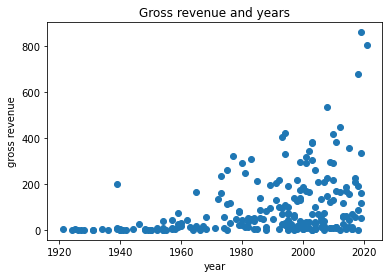

In [217]:
plt.scatter(data = data, x='year', y='gross($)(M)')
plt.xlabel('year')
plt.ylabel('gross revenue')
plt.title('Gross revenue and years');

#### Comparing the Rankings with other features
**Are the highest ranked movies the ones with very high gross revenue?**

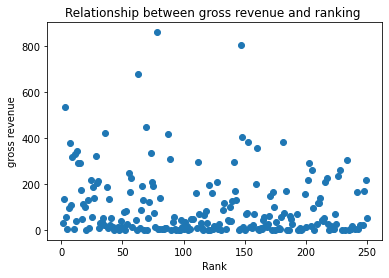

In [220]:
plt.scatter(data = data, x='rank', y='gross($)(M)')
plt.title('Relationship between gross revenue and ranking ')
plt.ylabel('gross revenue')
plt.xlabel('Rank');

**Relationship between Rank and Runtime**

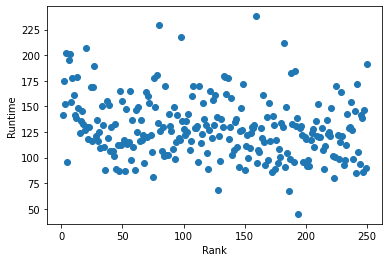

In [231]:
plt.scatter(data = data, x='rank', y='runtime(min)')
plt.xlabel('Rank')
plt.ylabel('Runtime');

**Relationship Between Metascore and Rank**

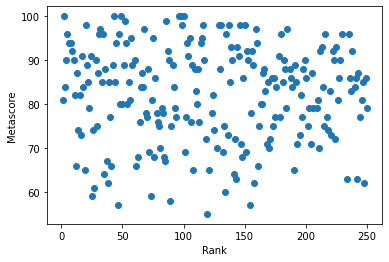

In [230]:
plt.scatter(data = data, x='rank', y='metascore')
plt.xlabel('Rank')
plt.ylabel('Metascore');

**Relationship between rank and Rating**

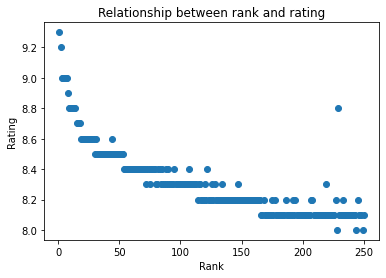

In [224]:
plt.scatter(data = data, x='rank', y='rating')
plt.xlabel('Rank')
plt.ylabel('Rating')
plt.title('Relationship between rank and rating');

**Relationship Between Rating and votes**

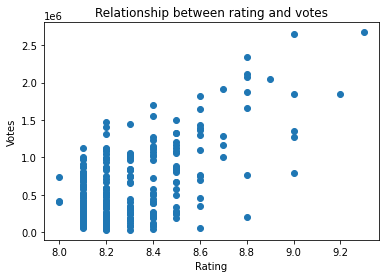

In [227]:
plt.scatter(data = data, x='rating', y='votes')
plt.xlabel('Rank')
plt.ylabel('Votes')
plt.title('Relationship between rating and votes');

**Relationship between Rank and Votes**

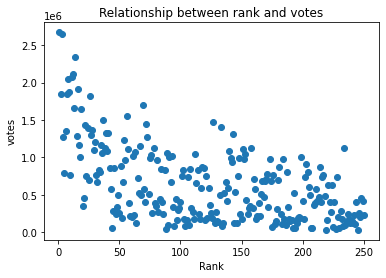

In [229]:
plt.scatter(data = data, x='rank', y='votes')
plt.xlabel('Rank')
plt.ylabel('votes')
plt.title('Relationship between rank and votes');

**Heatmap showing correlation between variables**

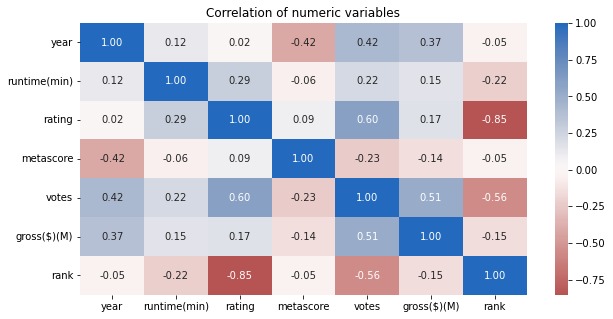

In [215]:
plt.figure(figsize = (10, 5))
sns.heatmap(data.corr(),annot=True,cmap='vlag_r', fmt='.2f', center = 0);
plt.title('Correlation of numeric variables', fontsize = 12);

### Findings
* The data spanned movies released in a wide range of years (1921 – 2022). The year with the highest top movies was 1995. 
* The top 250 movies are high rated movies with a minimum of 8 and a maximum of 9.3. 75% of the data are rated around 8.
* The above cannot really be said for the metascore. The metascore has a minimum of 55 and a maximum of 100.
* The gross revenue of more than half of the movies are below 50M dollars and 25% of the movies are well above 140M dollars with the maximum over 800M dollars. These movies do well in revenue considering that most of these movies are from way old back where inflation had not taken over, so the money had a lot of value.
* Majority of the movies are above 100 min and below 175 min duration.
* High ranked movies have higher ratings.
* There is a positive correlation between ratings and votes which is no surprise since the ratings are the average of the total  ratings the voters gave.
* Votes and rank have the same relationship has rank and ratings. This can also be understood from the relationship between ratings and votes.
* There is no significant relationship between rankings and the meatscore.


### Conclusion

The top 250 movies on IMDb are mostly dependent on the ratings which are done by voters(users) compared to the metascore which are done by the metacritics (movie critics).

### Limitation

The data was not enough to make concrete conclusions regarding the relationships between variables.